# Pymaceuticals Inc.
---

### Analysis

For this dataset, we are analyzing how effective ten different drug regimens are in decreasing the volume tumors in mice. 

The summary_stats_tumor dataframe showcases statistical analysis on the Tumor Volume for each of the 10 drugs presenting the mean, median, variance, standard deviation and standard error of the mean on the tumor volume. This is an insightful dataframe as it allows us to see how effective the drugs are at decreasing the tumor size over time on mice. 
This dataframe allows us to see that Capomulin and Ramicane were the most effective as they had the largest effect on the tumor sizes. Collecting the mean of each drug provides insight on how a tumor is responding to the regimen. In the case for Capomulin and Ramicane, they had the lowest averages which indicate the tumor volume have decreased the most out of all regimens with 40.675741 and 40.216745 respectively. We also see the variance on each regimen which shows how consistant the study is on tumors. Capomulin and Ramicane both have the lowest variances indicating that the decrease in volume is consistant using both these regimens with variance values of 24.9 and 23.4 respectively.
Ketapril has the largest variance  of 68.5 and the highest average of 55.2, indicating it is the least effective drug.

With a bar plot showing the total number of timepoints for all mice tested for each drug regimen, we are given a clear idea of how much data was collected for each regimen on the mice. We clearly see that the same two drugs mentioned above have the largest timepoints collected. Being able to see such data helps us determine is the study is accurate or not across all regimines. 
This data could be the number of mice, or the duration of time the mice survived using a given drug.   
Therefore to get the best comparison for all drugs, it is important to get the largest timepoint for each. In this case we retrieved the largest timepoint for 4 drugs: Capomulin, Ramicane, Infubinol, and Ceftamin all have a timepoint of 45.
The timepoint is the duration of time for the study. By filtering the regimens to all have the same timepoint, it is a fairer analysis and completness of data.

Using the largest timepoint for the 4 regimens, an analysis of the datas outliers done using IQR. For Capomulin and Ramicane, there are no potential outliers, as indicated by an empty "Series". For Infubinol, there is one potential outlier with a tumor volume of 36.32 mm3. Finally, there are no potential outliers for Ceftamin, again indicated by an empty Series. Identifying and removing outliers allows for more accurate data analysis. 

A boxplot is done to show the districution of the data for each of the 4 regimens. This graph clearly shows that the tumor volumnes for Capomulin and Ramicane are small and both have the data within the IQR. Infubinol and Ceftamin are not distributed quite as closely and Infubinol's outlier is seen here. Capomulin and Ramicane once again proove to be more effective in this study.

The line graph studies the tume volume and timepoint for 1 mouse, ID: l509 using the regimen Capomulin. This line graph shows the tumors behavior over the mouses timepoints with the y axis being the size of the tumor and the x axis being the time. The trend of this line is sigificantly decreasing meaning this drug is successful in reducing the size of the tumor over time for this mouse.  

The scatterplot shows the positive relation netween the averge tumor volume and weight of the mouse indicating that the weight of the heavier the mouse the higher the average tumor volume is. A pearson correlation coefficient was made on the two variables giving a results of 0.84. this is a strong correlation value meaning they are highly correlated. On top of the scatterplot a linear regression was added to visualize the relation. 

#### Conclusion: Capomulin and Ramicane appear to be the most effective in reducing the tumor volume over time in mice. With no outliers and consistent effectiveness over time in reduing the tumor size in mice, Capomulin is in the lead.   Infubinol showed the least impressive results out of the 4 studied treatments, proving to be ineffective with a wide IQR distribution, a high tumor volume mean and  variance.

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random


from scipy import stats


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results,mouse_metadata,
                       on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [57]:
# Checking the number of mice.
num_mice = combined_df['Mouse ID'].nunique()
num_mice

249

In [58]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

duplicate_ids = duplicates['Mouse ID'].unique()

duplicate_ids


array(['g989'], dtype=object)

In [59]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data = combined_df.loc[combined_df['Mouse ID'].isin(duplicate_ids)]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [60]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

drop_dup_df= combined_df.drop_duplicates(subset=['Mouse ID'], keep='first')

drop_dup_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [61]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = drop_dup_df['Mouse ID'].count()
num_mice_clean

249

## Summary Statistics

In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

group_reg=combined_df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumor=group_reg["Tumor Volume (mm3)"].mean()
median_tumor=group_reg["Tumor Volume (mm3)"].median()
var_tumor=group_reg["Tumor Volume (mm3)"].var()
std_tumor=group_reg["Tumor Volume (mm3)"].std()
sem_tumor=group_reg["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.

summary_stats_tumor = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor,
   "Median Tumor Volume": median_tumor,
    "Tumor Volume Variance": var_tumor,
    "Tumor Volume Std. Dev.": std_tumor,
    "Tumor Volume Std. Err.": sem_tumor
})
summary_stats_tumor


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [63]:

# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

summary_stats_tumor2 = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_tumor2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

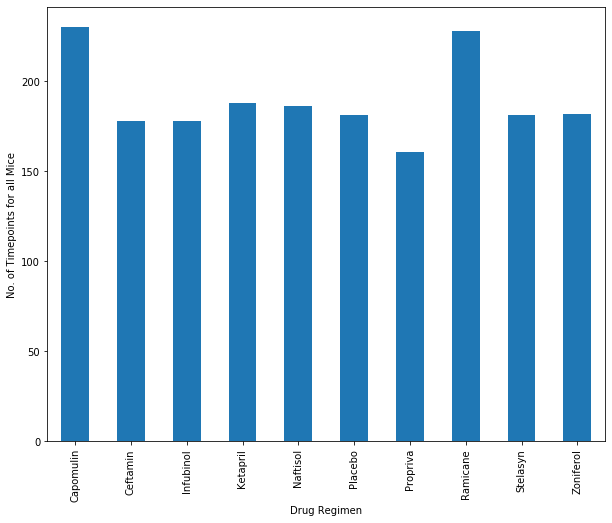

In [64]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_count=combined_df.groupby("Drug Regimen")["Timepoint"].count()
timepoint_count.plot(kind="bar", figsize=(10,8))
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Timepoints for all Mice")
plt.show()

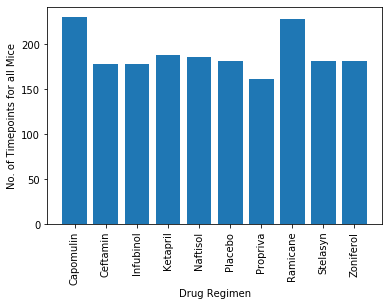

In [65]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(timepoint_count.index, timepoint_count.values)
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Timepoints for all Mice")
plt.xticks(rotation=90, ha='center')

plt.show()

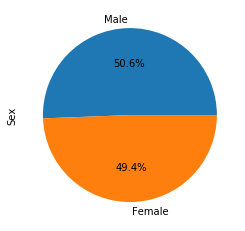

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mf_count=combined_df["Sex"].value_counts()

mf_count.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("Sex")

plt.show()

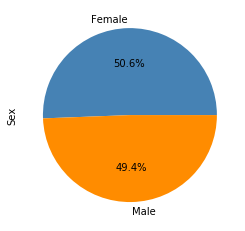

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mf_count, labels=["Female", "Male"], colors=["steelblue", "darkorange"], autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimen_df = combined_df.loc[combined_df["Drug Regimen"].isin(regimens)]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = regimen_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint, regimen_df, on=["Mouse ID", "Timepoint"], how="left")
final_tumor_vol_df = merged_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
final_tumor_vol_df.head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543


In [69]:
regimen_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [70]:
max_timepoint.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45


In [71]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    # Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in regimens:
    tumor_vol = final_tumor_vol_df.loc[final_tumor_vol_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vol)  

    # Calculate quartiles, IQR, and lower and upper bounds
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)

    # Determine if there are any potential outliers
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    num_outliers = outliers.count()


    # Print summary statistics
    print(f"\n{regimen} Summary Statistics:")
    print(f"---------------------------")
    print(f"Number of potential outliers: {outliers}")
    print(f"Number of potential outliers: {num_outliers}")
    if num_outliers > 0:
        print(f"Potential outliers: {outliers.tolist()}")


Capomulin Summary Statistics:
---------------------------
Number of potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Number of potential outliers: 0

Ramicane Summary Statistics:
---------------------------
Number of potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Number of potential outliers: 0

Infubinol Summary Statistics:
---------------------------
Number of potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Number of potential outliers: 1
Potential outliers: [36.321345799999996]

Ceftamin Summary Statistics:
---------------------------
Number of potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Number of potential outliers: 0


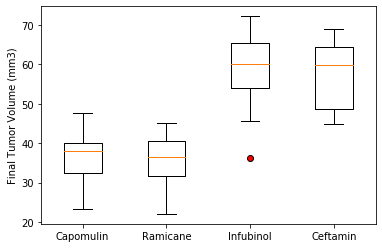

In [72]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax = plt.subplots()
ax.set_xticklabels(regimens)
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.boxplot(tumor_vol_data, flierprops={'markerfacecolor': 'red', 'marker': 'o'})
plt.show()

## Line and Scatter Plots

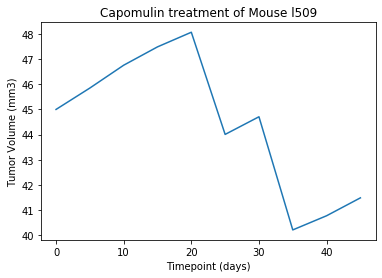

In [73]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_mice = final_tumor_vol_df.loc[final_tumor_vol_df['Drug Regimen'] == 'Capomulin', 'Mouse ID'].unique()
mouse_id="l509"

capomulin_df = combined_df.loc[(combined_df['Mouse ID'] == mouse_id) & (combined_df['Drug Regimen'] == 'Capomulin')]

#plot
plt.plot(capomulin_df['Timepoint'], capomulin_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of Mouse {mouse_id}')
plt.show()

In [74]:
capomulin_mice

array(['b128', 'b742', 'f966', 'g288', 'g316', 'i557', 'i738', 'j119',
       'j246', 'l509', 'l897', 'm601', 'm957', 'r157', 'r554', 'r944',
       's185', 's710', 't565', 'u364', 'v923', 'w150', 'w914', 'x401',
       'y793'], dtype=object)

In [75]:
capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1721,l509,0,45.000000,0,Capomulin,Male,17,21
1722,l509,5,45.851193,0,Capomulin,Male,17,21
1723,l509,10,46.759074,0,Capomulin,Male,17,21
1724,l509,15,47.488599,1,Capomulin,Male,17,21
1725,l509,20,48.070452,2,Capomulin,Male,17,21


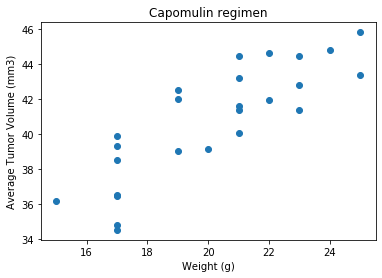

In [76]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df2 = combined_df.loc[(combined_df['Drug Regimen'] == 'Capomulin')]
capomulin_grouped = capomulin_df2.groupby(['Mouse ID']).agg({'Tumor Volume (mm3)': ['mean'], 'Weight (g)': ['mean']})


plt.scatter(capomulin_grouped["Weight (g)"], capomulin_grouped["Tumor Volume (mm3)"], marker="o")
plt.title("Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


In [77]:
capomulin_df2 = combined_df.loc[(combined_df['Drug Regimen'] == 'Capomulin')]
capomulin_grouped2 = capomulin_df2.groupby(['Mouse ID']).agg({'Tumor Volume (mm3)': ['mean'], 'Weight (g)': ['mean']})
capomulin_grouped2.head()

,Tumor Volume (mm3),Weight (g)
,mean,mean
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22


In [78]:
capomulin_grouped.head()

,Tumor Volume (mm3),Weight (g)
,mean,mean
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


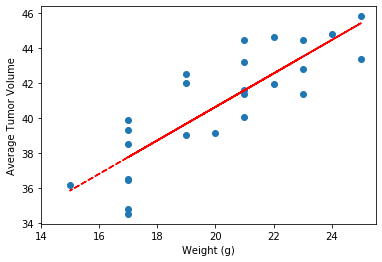

In [79]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Calculate the correlation coefficient 

weight = capomulin_grouped['Weight (g)']['mean']
tumor_volume = capomulin_grouped['Tumor Volume (mm3)']['mean']
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(weight,tumor_volume)[0],2)}")

# Perform a linear regression on weight versus tumor_volume
tv_slope, tv_int, tv_r, tv_p, tv_std_err = st.linregress(weight, tumor_volume)

# Create equation of line to calculate predicted number of tumor_volume
tv_fit = tv_slope * weight + tv_int

# Plot the linear model on top of scatter plot 

plt.scatter(weight,tumor_volume)
plt.plot(weight,tv_fit,"--", color="red")
plt.xticks(range(14,26,2))
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')

plt.show()

